# Training a neural net with Keras (reduced dset split)

**Imports**

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix
import pickle

tf.__version__
keras.__version__

ModuleNotFoundError: No module named 'scipy.sparse._sparsetools'

**Build model**

In [2]:
def build_model(in_shape=(750,), l1_units=200, l2_units=200, dropout=0.2):
    """Builds a 2 layer neural network for binary classification with tf.keras.
    """
    # Build model
    model = keras.models.Sequential([
        keras.layers.Dense(units=l1_units, input_shape=in_shape, activation='relu'),
        keras.layers.Dropout(rate=dropout),
        keras.layers.Dense(units=l2_units, activation='relu'),
        keras.layers.Dropout(rate=dropout),
        keras.layers.Dense(units=1, activation='sigmoid')
    ])
    
    # Compile model
    model.compile(optimizer = 'rmsprop', 
                  loss = 'binary_crossentropy', 
                  metrics = ['accuracy'])
    return model

## 9-fold cross-validation

**Import data**

In [57]:
data = pd.read_csv('../Data/Reduced/reduced_dset_wnames.csv')
data = data.drop(columns=['BirdID']).to_numpy()

**Train models**

In [58]:
# initialise empty dicts
metrics_rand = {}
histories_rand = {}

for x in range(1, 10):
    # fit 9 models with different randomly selected 20% training sets and average accuracy accross
    
    print(f'\nPROCESSING SAMPLE {x}/9...\n')
    
    print('Splitting into train/test...')
    msk = np.random.rand(len(data)) < 0.8
    train = data[msk]
    test = data[~msk]

    # train
    train_x = train[:,:-1]
    train_y = train[:,-1]

    # test
    test_x = test[:,:-1]
    test_y = test[:,-1]

    print(f'\nTrain shape: {train.shape}')
    print(f'Test shape: {test.shape}')
    print(f'Total dataset shape: {data.shape}')
    print(f'Total dives: {sum(data[:,-1] == 1)}')
    print(f'Total non-dives: {sum(data[:,-1] == 0)}\n')
    
    # Build model
    model = build_model(in_shape=train_x[0].shape)
    
    # Train model
    print('Fitting model...')
    history = model.fit(train_x, train_y, epochs=50)
    
    histories_rand[x] = pd.DataFrame(history.history)
    
    # Evaluate model
    print('\n')
    mets = model.evaluate(test_x, test_y)
    
    metrics_rand[x] = mets


PROCESSING SAMPLE 1/9...

Splitting into train/test...

Train shape: (17052, 751)
Test shape: (4196, 751)
Total dataset shape: (21248, 751)
Total dives: 9990
Total non-dives: 11258

Fitting model...
Epoch 1/50
533/533 [==============================] - 6s 7ms/step - loss: 0.1939 - accuracy: 0.9300
Epoch 2/50
533/533 [==============================] - 4s 8ms/step - loss: 0.0963 - accuracy: 0.9684
Epoch 3/50
533/533 [==============================] - 4s 7ms/step - loss: 0.0623 - accuracy: 0.9780
Epoch 4/50
533/533 [==============================] - 3s 6ms/step - loss: 0.0508 - accuracy: 0.9835
Epoch 5/50
533/533 [==============================] - 4s 7ms/step - loss: 0.0462 - accuracy: 0.9869
Epoch 6/50
533/533 [==============================] - 3s 6ms/step - loss: 0.0343 - accuracy: 0.9893
Epoch 7/50
533/533 [==============================] - 3s 6ms/step - loss: 0.0298 - accuracy: 0.9911
Epoch 8/50
533/533 [==============================] - 4s 7ms/step - loss: 0.0315 - accuracy: 0.9914


532/532 [==============================] - 3s 5ms/step - loss: 0.0920 - accuracy: 0.9714
Epoch 3/50
532/532 [==============================] - 3s 6ms/step - loss: 0.0675 - accuracy: 0.9782
Epoch 4/50
532/532 [==============================] - 3s 6ms/step - loss: 0.0475 - accuracy: 0.9841
Epoch 5/50
532/532 [==============================] - 3s 6ms/step - loss: 0.0422 - accuracy: 0.9868
Epoch 6/50
532/532 [==============================] - 3s 6ms/step - loss: 0.0345 - accuracy: 0.9898
Epoch 7/50
532/532 [==============================] - 3s 5ms/step - loss: 0.0318 - accuracy: 0.9904
Epoch 8/50
532/532 [==============================] - 3s 6ms/step - loss: 0.0283 - accuracy: 0.9924
Epoch 9/50
532/532 [==============================] - 3s 6ms/step - loss: 0.0253 - accuracy: 0.9926
Epoch 10/50
532/532 [==============================] - 3s 6ms/step - loss: 0.0245 - accuracy: 0.9931
Epoch 11/50
532/532 [==============================] - 3s 6ms/step - loss: 0.0170 - accuracy: 0.9942
Epoch 12/

534/534 [==============================] - 3s 6ms/step - loss: 0.0393 - accuracy: 0.9873
Epoch 6/50
534/534 [==============================] - 3s 6ms/step - loss: 0.0340 - accuracy: 0.9894
Epoch 7/50
534/534 [==============================] - 3s 5ms/step - loss: 0.0319 - accuracy: 0.9898
Epoch 8/50
534/534 [==============================] - 3s 5ms/step - loss: 0.0277 - accuracy: 0.9913
Epoch 9/50
534/534 [==============================] - 3s 5ms/step - loss: 0.0233 - accuracy: 0.9933
Epoch 10/50
534/534 [==============================] - 3s 5ms/step - loss: 0.0242 - accuracy: 0.9937
Epoch 11/50
534/534 [==============================] - 3s 5ms/step - loss: 0.0180 - accuracy: 0.9943
Epoch 12/50
534/534 [==============================] - 3s 5ms/step - loss: 0.0209 - accuracy: 0.9948
Epoch 13/50
534/534 [==============================] - 3s 5ms/step - loss: 0.0197 - accuracy: 0.9947
Epoch 14/50
534/534 [==============================] - 3s 5ms/step - loss: 0.0176 - accuracy: 0.9959
Epoch 

**Plot accuracies**

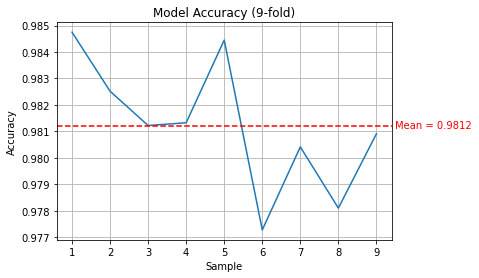

In [35]:
# Load stats to df
stats_rand = pd.DataFrame.from_dict(metrics_rand, orient='index', columns=['Loss', 'Accuracy'])

mn = stats_rand['Accuracy'].mean()

# Plot accuracy
acc = stats_rand.drop(columns=['Loss'])
plt_rand = plt.figure()
plt.plot(acc)
plt.axhline(y = mn, color = 'r', linestyle = '--')
plt.grid(True)
plt.text(len(acc)+0.5, mn, f'Mean = {np.round(mn, 4)}', 
         ha='left', va='center', color = 'r')
plt.xlabel("Sample")
plt.ylabel("Accuracy")
plt.title('Model Accuracy (9-fold)')
plt.show()

## Leave-one-out cross-validation

**Load data:**

In [46]:
data = pd.read_csv('../Data/Reduced/reduced_dset_wnames.csv')
birds = set(data['BirdID'])

**Cross-validate**

In [47]:
histories_bird = {}
metrics_bird = {}

for no, bird in enumerate(birds, 1):
    
    print(f"\nWITHHOLDING BIRD {no}: '{bird}'\n")
    
    # Create dta
    print('Creating data...\n')
    test = data[data['BirdID'] == bird]
    train = data[data['BirdID'] != bird]
    
    # Split data
    train_x = train.drop(columns=['Dive', 'BirdID'])
    train_y = train['Dive']
    test_x = test.drop(columns=['Dive', 'BirdID'])
    test_y = test['Dive']
    
    # Build model
    model = build_model(in_shape=train_x.iloc[0].shape)
    
    # Train model
    print('Fitting model...')
    history = model.fit(train_x, train_y, epochs=50)
    
    histories_bird[bird] = pd.DataFrame(history.history)
    
    # Evaluate model
    print('\n')
    mets = model.evaluate(test_x, test_y)
    
    metrics_bird[bird] = mets
    


WITHHOLDING BIRD 1: 'ch_gps08_S1'

Creating data...

Fitting model...
Epoch 1/50
588/588 [==============================] - 5s 6ms/step - loss: 0.1887 - accuracy: 0.9290
Epoch 2/50
588/588 [==============================] - 4s 7ms/step - loss: 0.0895 - accuracy: 0.9712
Epoch 3/50
588/588 [==============================] - 4s 6ms/step - loss: 0.0622 - accuracy: 0.9800
Epoch 4/50
588/588 [==============================] - 3s 6ms/step - loss: 0.0474 - accuracy: 0.9852
Epoch 5/50
588/588 [==============================] - 3s 6ms/step - loss: 0.0400 - accuracy: 0.9881
Epoch 6/50
588/588 [==============================] - 3s 6ms/step - loss: 0.0373 - accuracy: 0.9889
Epoch 7/50
588/588 [==============================] - 4s 6ms/step - loss: 0.0321 - accuracy: 0.9910
Epoch 8/50
588/588 [==============================] - 4s 7ms/step - loss: 0.0260 - accuracy: 0.9922: 0s - loss: 0.0263 - accura
Epoch 9/50
588/588 [==============================] - 4s 6ms/step - loss: 0.0267 - accuracy: 0.9929
E

595/595 [==============================] - 3s 5ms/step - loss: 0.0384 - accuracy: 0.9890
Epoch 7/50
595/595 [==============================] - 3s 5ms/step - loss: 0.0274 - accuracy: 0.9922
Epoch 8/50
595/595 [==============================] - 3s 5ms/step - loss: 0.0291 - accuracy: 0.9919
Epoch 9/50
595/595 [==============================] - 3s 5ms/step - loss: 0.0253 - accuracy: 0.9927
Epoch 10/50
595/595 [==============================] - 3s 5ms/step - loss: 0.0251 - accuracy: 0.9922
Epoch 11/50
595/595 [==============================] - 3s 5ms/step - loss: 0.0212 - accuracy: 0.9942
Epoch 12/50
595/595 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.99 - 3s 5ms/step - loss: 0.0201 - accuracy: 0.9947
Epoch 13/50
595/595 [==============================] - 4s 6ms/step - loss: 0.0190 - accuracy: 0.9942
Epoch 14/50
595/595 [==============================] - 3s 6ms/step - loss: 0.0178 - accuracy: 0.9954
Epoch 15/50
595/595 [==============================] - 3s 5ms/st

591/591 [==============================] - 4s 6ms/step - loss: 0.0228 - accuracy: 0.9937
Epoch 12/50
591/591 [==============================] - 4s 6ms/step - loss: 0.0216 - accuracy: 0.9944
Epoch 13/50
591/591 [==============================] - 4s 6ms/step - loss: 0.0221 - accuracy: 0.9948
Epoch 14/50
591/591 [==============================] - 3s 6ms/step - loss: 0.0186 - accuracy: 0.9956
Epoch 15/50
591/591 [==============================] - 4s 7ms/step - loss: 0.0147 - accuracy: 0.9961
Epoch 16/50
591/591 [==============================] - 3s 5ms/step - loss: 0.0159 - accuracy: 0.9952
Epoch 17/50
591/591 [==============================] - 3s 5ms/step - loss: 0.0183 - accuracy: 0.9958
Epoch 18/50
591/591 [==============================] - 3s 5ms/step - loss: 0.0146 - accuracy: 0.9966
Epoch 19/50
591/591 [==============================] - 5s 8ms/step - loss: 0.0132 - accuracy: 0.9961
Epoch 20/50
591/591 [==============================] - 4s 6ms/step - loss: 0.0107 - accuracy: 0.9975
Ep

**Plot accuracies:**

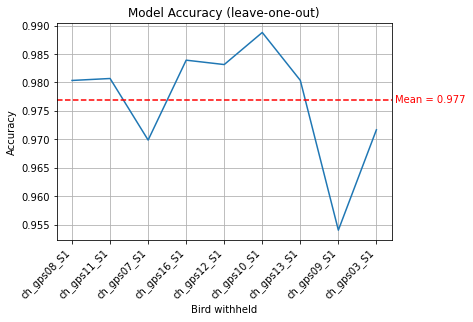

In [33]:
# Load stats to df
stats_bird = pd.DataFrame.from_dict(metrics_bird, orient='index', columns=['Loss', 'Accuracy'])

mn = stats_bird['Accuracy'].mean()

# Plot accuracy
acc = stats_bird.drop(columns=['Loss'])
plt_bird = plt.figure()
plt.plot(acc)
plt.axhline(y = mn, color = 'r', linestyle = '--')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.text(len(acc)-0.5, mn, f'Mean = {np.round(mn, 4)}', 
         ha='left', va='center', color = 'r')
plt.xlabel("Bird withheld")
plt.ylabel("Accuracy")
plt.title('Model Accuracy (leave-one-out)')
plt.show()

**Plot histories:**

In [233]:
#for bird, his in histories.items():
#    pd.DataFrame(his.history).plot(figsize=(8,5))
#    plt.grid(True)
#    plt.xlabel('epoch')
#    plt.title(f'Withheld bird: {bird}')
#    plt.show()

**Pickle dump stats**

In [98]:
mean_rand = stats_rand.mean()
mean_bird = stats_bird.mean()

In [27]:
# create dict to pickle
stats = {'rand': {'hist': histories_rand,
                  'perf': stats_rand,
                  'plot': plt_rand,
                  'mean': stats_rand.mean()
                 }, 
         'bird': {'hist': histories_bird, 
                  'perf': stats_bird,
                  'plot': plt_bird,
                  'mean': stats_bird.mean()
                 }
        }

# save
pickle.dump(stats, open("../Data/Reduced/Keras_bird_vs_rand_stats.p", "wb" ))

**Pickle load stats**

In [29]:
import pickle
stats = pickle.load(open("../Data/Reduced/Keras_bird_vs_rand_stats.p", "rb" ))

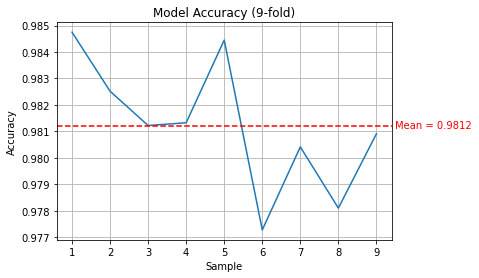

In [30]:
stats['rand']['plot']

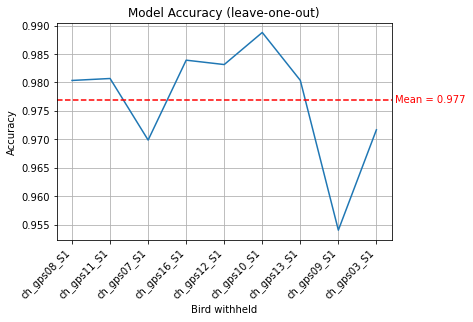

In [31]:
stats['bird']['plot']

# ROC curve stuff

Load data:

In [ ]:
train = pd.read_csv('../Data/Reduced/train_reduced_dset.csv').to_numpy()
test = pd.read_csv('../Data/Reduced/test_reduced_dset.csv').to_numpy()

# train
train_x = train[:,:-1]
train_y = train[:,-1]

# test
test_x = test[:,:-1]
test_y = test[:,-1]

print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')
print(f'Total dataset shape: {(train.shape[0] + test.shape[0], train.shape[1])}')
print(f'Total dives: {sum(np.vstack((train, test))[:,-1] == 1)}')
print(f'Total non-dives: {sum(np.vstack((train, test))[:,-1] == 0)}')

Models:

In [ ]:
y_pred = model.predict(test_x, batch_size=128)

# calculate roc curves
fpr, tpr, thresholds = roc_curve(test_y, y_pred)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='NN')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC curve')
plt.show()

# Calculate optimal threshold
gmeans = np.sqrt(tpr * (1-fpr))  # calculate the g-mean for each threshold
ix = np.argmax(gmeans)
threshold = thresholds[ix]

print(f'\nOptimal threshold: {threshold}')

print('\nConfusion Matrix:')
Y_pred = [1 * (x[0]>=threshold) for x in y_pred]
conf = confusion_matrix(test_y, Y_pred)
print(conf)

print(f'\nErrors: {conf[0,1]+conf[1,0]}')